# CLASSIFICATION

In [1]:
#it is type of supervised method
#we use regression for continuous answers
#and use classification if answer is divided into classes eg class for odd or even etc
#for eg digit recognition ,in this we have class of all the digits
#type 1 of classification is perceptron-Binary Clasification in this answer is in yes or no

In [2]:
#Binary Classification using Perceptron
#it requires a dataset where it can draw a single line that can divide a solution into 2 classes ie yes or no
#heaviside step function g(x)=1 if x>0 ,0 if x<0
#it it is used for 1d space and Binary Classification using Perceptron we use 2d spce (here we need to find slope of the separator)
#in eg to find if player can be a goalkeeoer or not based on height ,to fit this model in heaviside step function we add a constant a to x
#so we find minimum a to classify the solution
#in perceptron model ,model parameter is n+1 n=no of input,for each input 1 weight value and a threshold function parameter
#in regression model ther are 2 model parameter ie slope m and coefficient c

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df=pd.DataFrame({'sleep_proportion':[0.2,0.4,0.5,0.7],
                 'grumpy_proportion':[0.1,0.6,0.2,0.9],
                 'prediction':['kitten','kitten','kitten','adult']})
df.head()

,sleep_proportion,grumpy_proportion,prediction
0,0.2,0.1,kitten
1,0.4,0.6,kitten
2,0.5,0.2,kitten
3,0.7,0.9,adult


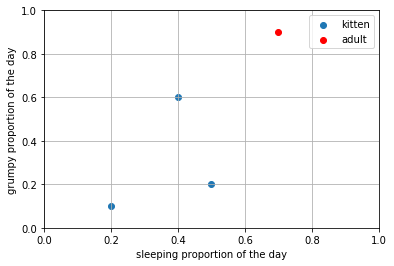

In [5]:
kittens=df[df['prediction']=='kitten']
adults=df[df['prediction']=='adult']
plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],label='kitten')
plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],color='r',label='adult')    
plt.legend()
plt.xlabel('sleeping proportion of the day')
plt.ylabel('grumpy proportion of the day')
plt.axis([0,1,0,1])
plt.grid()

In [6]:
df['bprediction']=df['prediction'].apply(lambda x:x=='kitten')
from sklearn.linear_model import Perceptron

classifier=Perceptron(max_iter=1000)
model=classifier.fit(df[['sleep_proportion','grumpy_proportion']],df['bprediction'])#in classifier we are passing dleep and grumpy values and bprediction ie the label column
#sleep and grumpy in this we are passing the table so we are making list of list
df


,sleep_proportion,grumpy_proportion,prediction,bprediction
0,0.2,0.1,kitten,True
1,0.4,0.6,kitten,True
2,0.5,0.2,kitten,True
3,0.7,0.9,adult,False


# predict

In [7]:
model.predict([[0.4,0.4],[0.9,0.95]])
#here 0.4,0.4 is kitten so true 
#and for 0.9,0.95 is adult so false

array([ True, False])

In [10]:
#print output value
print('weight_0'+str(model.coef_[0,0]))
print('weight_1'+str(model.coef_[0,1]))
print('threshold'+str(model.intercept_))

print((model.coef_[0,0]*df['sleep_proportion']+model.coef_[0,1]*df['grumpy_proportion']))

weight_0-0.2999999999999999
weight_1-0.9
threshold[1.]
0   -0.15
1   -0.66
2   -0.33
3   -1.02
dtype: float64


[[0.   0.01 0.02 ... 0.97 0.98 0.99]
 [0.   0.01 0.02 ... 0.97 0.98 0.99]
 [0.   0.01 0.02 ... 0.97 0.98 0.99]
 ...
 [0.   0.01 0.02 ... 0.97 0.98 0.99]
 [0.   0.01 0.02 ... 0.97 0.98 0.99]
 [0.   0.01 0.02 ... 0.97 0.98 0.99]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.97 0.97 0.97 ... 0.97 0.97 0.97]
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.   0.  ]
 [0.01 0.  ]
 [0.02 0.  ]
 [0.03 0.  ]
 [0.04 0.  ]
 [0.05 0.  ]
 [0.06 0.  ]
 [0.07 0.  ]
 [0.08 0.  ]
 [0.09 0.  ]
 [0.1  0.  ]
 [0.11 0.  ]
 [0.12 0.  ]
 [0.13 0.  ]
 [0.14 0.  ]
 [0.15 0.  ]
 [0.16 0.  ]
 [0.17 0.  ]
 [0.18 0.  ]
 [0.19 0.  ]]
[ True  True  True ... False False False]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...

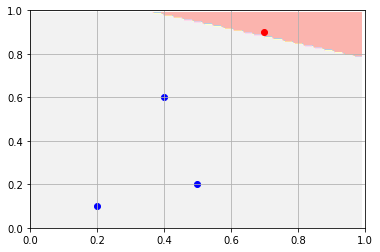

In [16]:
import numpy as np

x_min,x_max=0,1#minimum x/y is 0 and maximum x/y is1
y_min,y_max=0,1

xx,yy=np.meshgrid(np.arange(x_min,x_max, .01),np.arange(y_min,y_max, .01))
#storing xx ,yy with 0.2 step in every range

print(xx); print(yy);
xx_lin=xx.ravel(); print(xx_lin[:10]); #ravel converts table of array into series snd stores in xx_lin
yy_lin=yy.ravel(); print(yy_lin[:10]); #ravel converts table of array into series
pred_input=np.c_[xx_lin,yy_lin];print(pred_input[:20])#np.c combines each xx_lin value with corresponding yy_lin and stores into pred_input

z=model.predict(pred_input);print(z)#passing each table row of pred_input to predict and store in z,it gives a series of true/false values
z=z.reshape(xx.shape);print(z)#converting z from series to table of xx shape ie 25 rows and 5 columns

#contour plot requires 2 dimensional matrix
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)
#input to contourf is 3 ie xx ,yy and z(where to plot true and where to plot false),cmap is from matplotlib it has 2 colours in pastel1 0for hagih value color and 1 for low valued color

plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],color='b',label='kitten')
plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],color='r',label='adult')

plt.axis([0,1,0,1])
plt.grid()

# support vector machine

In [24]:
from sklearn.svm import SVC
#importing support vector classifier
SVCClassifier=SVC(kernel='linear',C=10,max_iter=100)#using liner line for classification,penalty is 10 if miss any point,is c(penalty)=1 then it becomes lineient and skips few points here it will make all true
SVCModel=SVCClassifier.fit(df[['sleep_proportion','grumpy_proportion']],df['bprediction'])

[ True False]


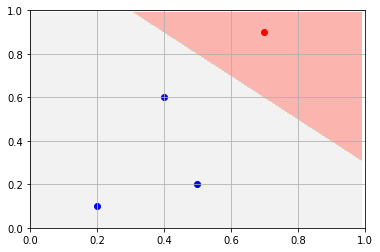

In [25]:
SVC_z=SVCModel.predict(pred_input)
SVC_z=SVC_z.reshape(xx.shape)

print(SVCModel.predict([[0,0],[1,1]]))
#contour plot requires 2 dimensional matrix
plt.contourf(xx,yy,SVC_z,cmap=plt.cm.Pastel1)


plt.scatter(kittens['sleep_proportion'],kittens['grumpy_proportion'],color='b',label='kitten')
plt.scatter(adults['sleep_proportion'],adults['grumpy_proportion'],color='r',label='adult')

plt.axis([0,1,0,1])
plt.grid()